<a href="https://colab.research.google.com/github/koeyhnim/banghak/blob/chap-5/my_notebook_chap5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

100%|██████████| 170M/170M [00:04<00:00, 42.4MB/s]


데이터의 수: 10000


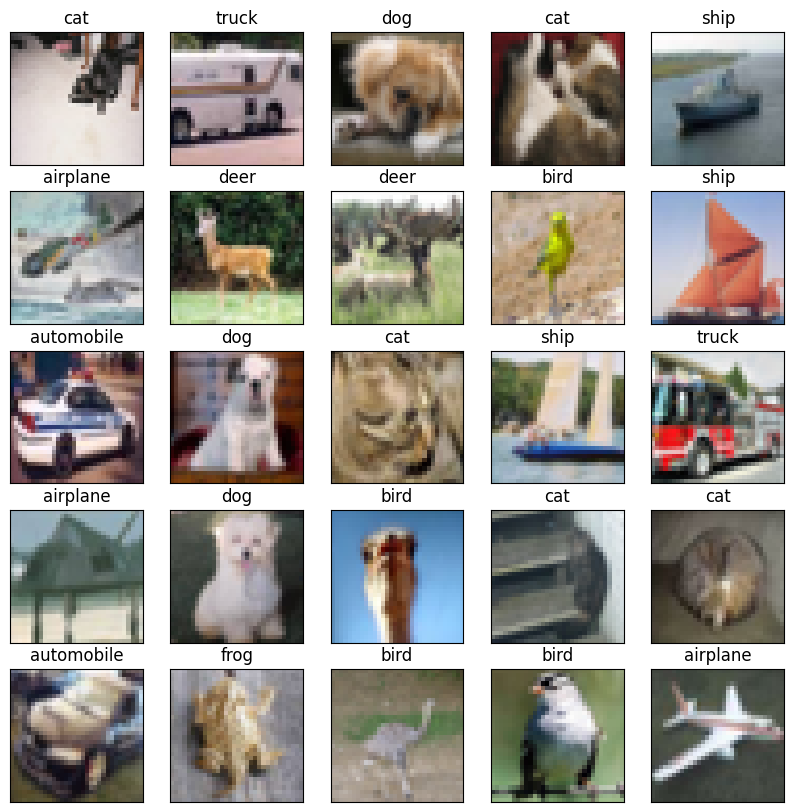

In [2]:
from torchvision.datasets import CIFAR10
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

cifar10_data = CIFAR10(root="./data",
                       train=False,download=True,
                       transform=transforms.ToTensor())
cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer",
                   "dog", "frog", "horse", "ship", "truck"]
print("데이터의 수:", len(cifar10_data))

n_image = 25  # 표시하는 이미지의 수
cifar10_loader = DataLoader(cifar10_data, batch_size=n_image, shuffle=True)
dataiter = iter(cifar10_loader)  # 이터레이터: 요소를 차례대로 꺼낼 수 있게 한다
images, labels = next(dataiter)  # 처음의 배치를 꺼낸다

plt.figure(figsize=(10,10))  # 이미지의 표시 크기
for i in range(n_image):
    ax = plt.subplot(5,5,i+1)
    ax.imshow(images[i].permute(1, 2, 0))  # 채널을 가장 뒤의 차원으로
    label = cifar10_classes[labels[i]]
    ax.set_title(label)
    ax.get_xaxis().set_visible(False)  # 축을 비표시로
    ax.get_yaxis().set_visible(False)

plt.show()

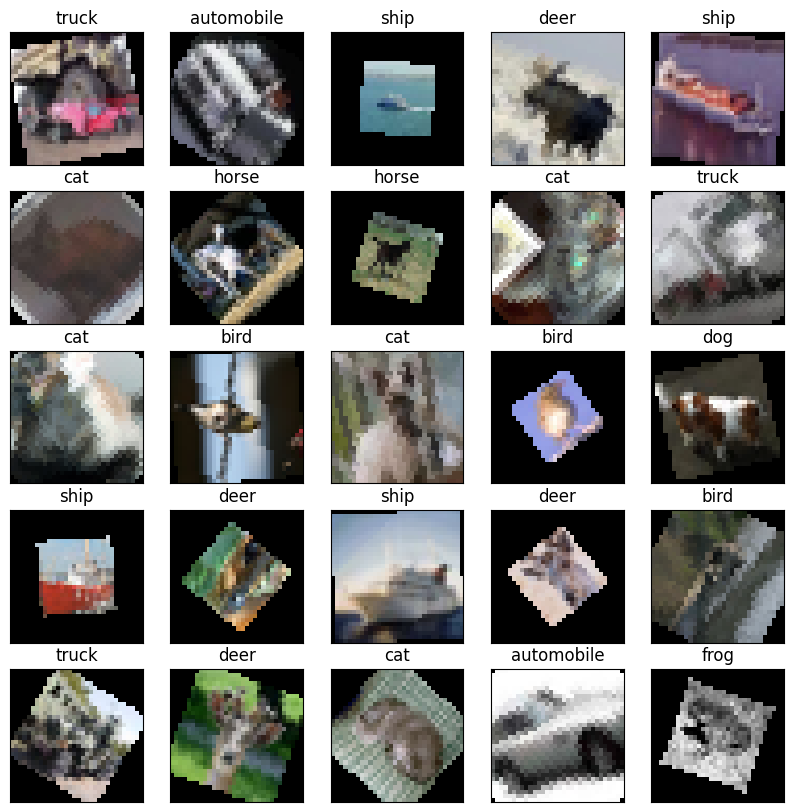

In [3]:
transform = transforms.Compose([transforms.RandomAffine((-45, 45), scale=(0.5, 1.5)),  # 회전과 크기 조절
                                transforms.ToTensor()])
cifar10_data = CIFAR10(root="./data",
                       train=False,download=True,
                       transform=transform)

cifar10_loader = DataLoader(cifar10_data, batch_size=n_image, shuffle=True)
dataiter = iter(cifar10_loader)
images, labels = next(dataiter)

plt.figure(figsize=(10,10))  # 이미지의 표시 크기
for i in range(n_image):
    ax = plt.subplot(5,5,i+1)
    ax.imshow(images[i].permute(1, 2, 0))
    label = cifar10_classes[labels[i]]
    ax.set_title(label)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

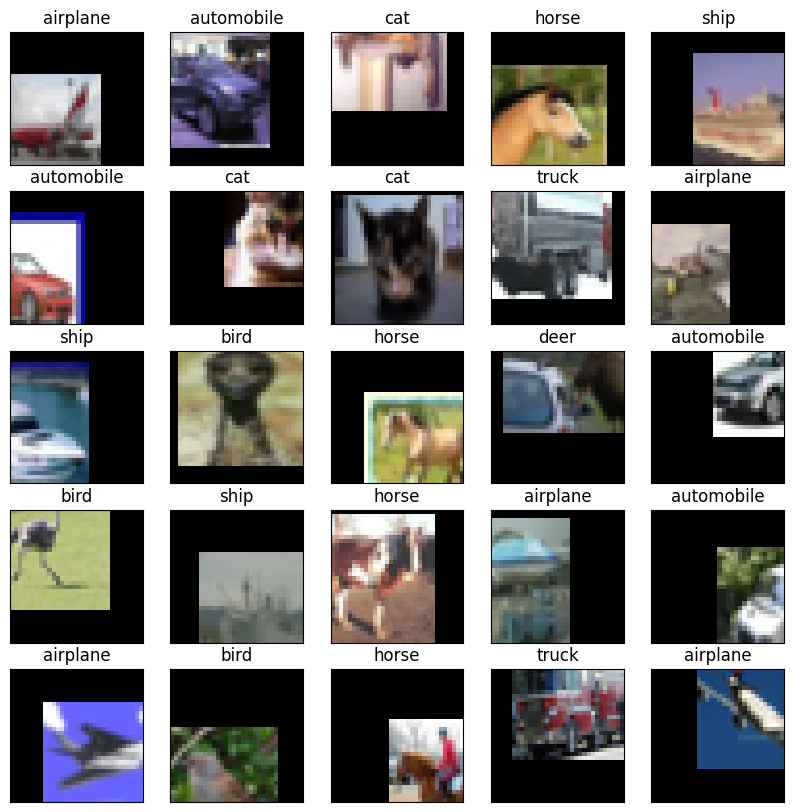

In [4]:
transform = transforms.Compose([transforms.RandomAffine((0, 0), translate=(0.5, 0.5)),  # 상하좌우로 시프트
                                transforms.ToTensor()])
cifar10_data = CIFAR10(root="./data",
                       train=False,download=True,
                       transform=transform)

cifar10_loader = DataLoader(cifar10_data, batch_size=n_image, shuffle=True)
dataiter = iter(cifar10_loader)
images, labels = next(dataiter)

plt.figure(figsize=(10,10))  # 이미지의 표시 크기
for i in range(n_image):
    ax = plt.subplot(5,5,i+1)
    ax.imshow(images[i].permute(1, 2, 0))
    label = cifar10_classes[labels[i]]
    ax.set_title(label)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

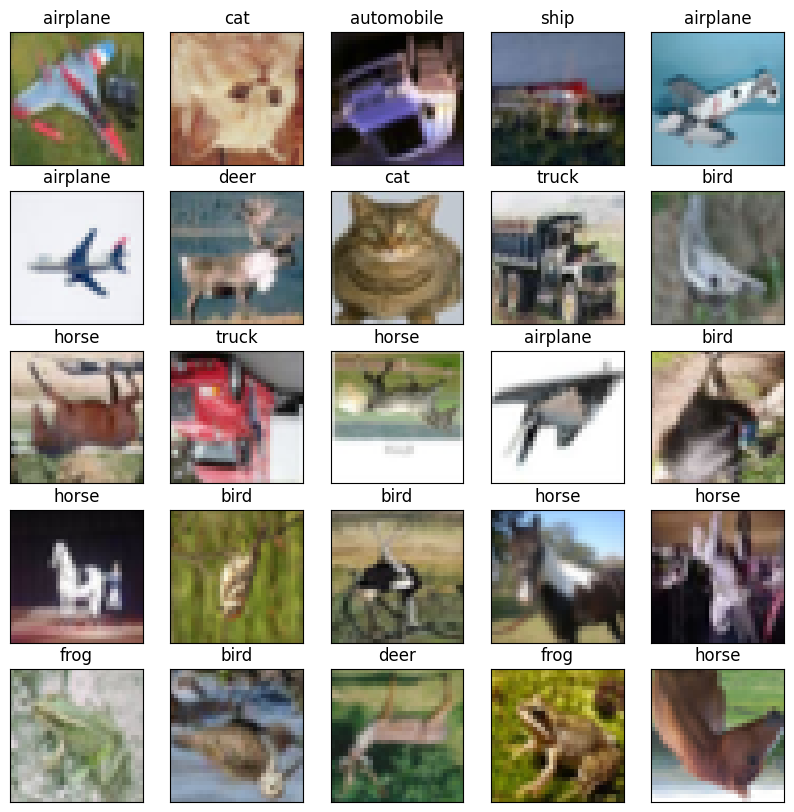

In [5]:
transform = transforms.Compose([transforms.RandomHorizontalFlip(p=0.5),  # 좌우 반전
                                transforms.RandomVerticalFlip(p=0.5),  # 상하 반전
                                transforms.ToTensor()])
cifar10_data = CIFAR10(root="./data",
                       train=False,download=True,
                       transform=transform)

cifar10_loader = DataLoader(cifar10_data, batch_size=n_image, shuffle=True)
dataiter = iter(cifar10_loader)
images, labels = next(dataiter)

plt.figure(figsize=(10,10))  # 이미지의 표시 크기
for i in range(n_image):
    ax = plt.subplot(5,5,i+1)
    ax.imshow(images[i].permute(1, 2, 0))
    label = cifar10_classes[labels[i]]
    ax.set_title(label)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


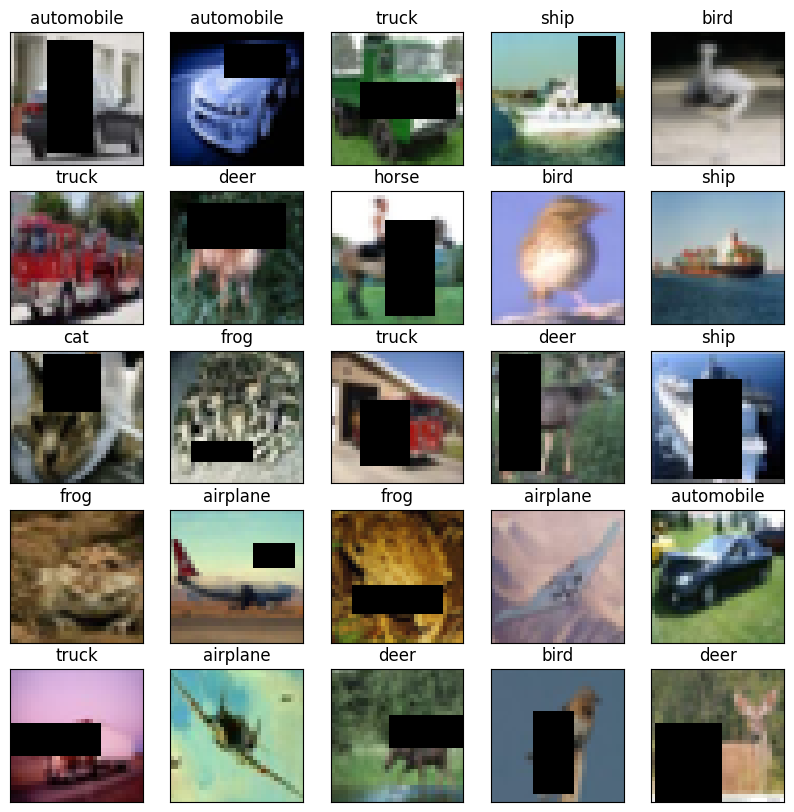

In [6]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.RandomErasing(p=0.5)])  # 일부를 소거
cifar10_data = CIFAR10(root="./data",
                       train=False,download=True,
                       transform=transform)

cifar10_loader = DataLoader(cifar10_data, batch_size=n_image, shuffle=True)
dataiter = iter(cifar10_loader)
images, labels = next(dataiter)

plt.figure(figsize=(10,10))  # 이미지의 표시 크기
for i in range(n_image):
    ax = plt.subplot(5,5,i+1)
    ax.imshow(images[i].permute(1, 2, 0))
    label = cifar10_classes[labels[i]]
    ax.set_title(label)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [7]:
from torchvision.datasets import CIFAR10
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer",
                   "dog", "frog", "horse", "ship", "truck"]

affine = transforms.RandomAffine((-30, 30), scale=(0.8, 1.2))  # 회전과 크기 조절
flip = transforms.RandomHorizontalFlip(p=0.5)  # 좌우 반전
normalize = transforms.Normalize((0.0, 0.0, 0.0), (1.0, 1.0, 1.0))  # 평균값을 0,  표준편차를 1로
to_tensor = transforms.ToTensor()

transform_train = transforms.Compose([affine, flip, to_tensor, normalize])
transform_test = transforms.Compose([to_tensor, normalize])
cifar10_train = CIFAR10("./data", train=True, download=True, transform=transform_train)
cifar10_test = CIFAR10("./data", train=False, download=True, transform=transform_test)

# DataLoader의 설정
batch_size = 64
train_loader = DataLoader(cifar10_train, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(cifar10_test, batch_size=batch_size, shuffle=False)

In [8]:
import torch.nn as nn

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 8, 5)  # 합성곱층:(입력 채널 수, 필터 수, 필터 크기)
        self.relu = nn.ReLU()  # ReLU
        self.pool = nn.MaxPool2d(2, 2)  # 풀링층:(영역의 크기, 영역의 간격)
        self.conv2 = nn.Conv2d(8, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 256)  # 전결합층
        self.dropout = nn.Dropout(p=0.5)  # 드롭아웃(p=드롭아웃률)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool(x)
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(-1, 16*5*5)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

net = Net()
net.cuda()  # GPU 대응
print(net)

Net(
  (conv1): Conv2d(3, 8, kernel_size=(5, 5), stride=(1, 1))
  (relu): ReLU()
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=256, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=256, out_features=10, bias=True)
)


In [9]:
from torch import optim

# 교차 엔트로피 오차 함수
loss_fnc = nn.CrossEntropyLoss()

# 최적화 알고리즘
optimizer = optim.Adam(net.parameters())

# 손실의 로그
record_loss_train = []
record_loss_test = []

# 학습
for i in range(20):  # 20 에포크 학습
    net.train()  # 훈련 모드
    loss_train = 0
    for j, (x, t) in enumerate(train_loader):  # 미니배치(x, t)를 꺼낸다
        x, t = x.cuda(), t.cuda()  # GPU 대응
        y = net(x)
        loss = loss_fnc(y, t)
        loss_train += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    loss_train /= j+1
    record_loss_train.append(loss_train)

    net.eval()  # 평가 모드
    loss_test = 0
    for j, (x, t) in enumerate(test_loader):  # 미니배치(x, t)를 꺼낸다
        x, t = x.cuda(), t.cuda()
        y = net(x)
        loss = loss_fnc(y, t)
        loss_test += loss.item()
    loss_test /= j+1
    record_loss_test.append(loss_test)

    if i%1 == 0:
        print("Epoch:", i, "Loss_Train:", loss_train, "Loss_Test:", loss_test)

Epoch: 0 Loss_Train: 1.8361487987706118 Loss_Test: 1.5362709791037688
Epoch: 1 Loss_Train: 1.6023054601591262 Loss_Test: 1.4375543723440474
Epoch: 2 Loss_Train: 1.530894580247152 Loss_Test: 1.3636183328689284
Epoch: 3 Loss_Train: 1.4773972107626288 Loss_Test: 1.3432766647095893
Epoch: 4 Loss_Train: 1.4448979626531187 Loss_Test: 1.2750120314822835
Epoch: 5 Loss_Train: 1.417167755648913 Loss_Test: 1.245479173721022
Epoch: 6 Loss_Train: 1.396232824801179 Loss_Test: 1.246675045626938
Epoch: 7 Loss_Train: 1.3727270145245525 Loss_Test: 1.2284078658766049
Epoch: 8 Loss_Train: 1.3641842189042463 Loss_Test: 1.1994896060342242
Epoch: 9 Loss_Train: 1.3366713125992309 Loss_Test: 1.1733722671581681
Epoch: 10 Loss_Train: 1.3297313803144732 Loss_Test: 1.1638470535065717
Epoch: 11 Loss_Train: 1.3196606823550465 Loss_Test: 1.1850799921971218
Epoch: 12 Loss_Train: 1.305141629694063 Loss_Test: 1.1243340551473533
Epoch: 13 Loss_Train: 1.3034066171444896 Loss_Test: 1.1889262161437113
Epoch: 14 Loss_Train: 

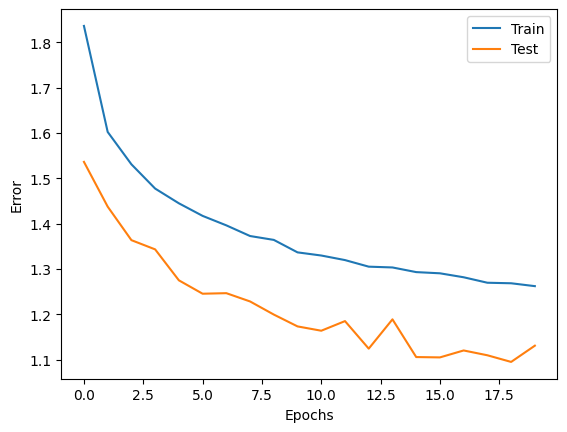

In [10]:
import matplotlib.pyplot as plt

plt.plot(range(len(record_loss_train)), record_loss_train, label="Train")
plt.plot(range(len(record_loss_test)), record_loss_test, label="Test")
plt.legend()

plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()

In [10]:
correct = 0
total = 0
net.eval()  # 평가 모드
for i, (x, t) in enumerate(test_loader):
    x, t = x.cuda(), t.cuda()  # GPU 대응
    y = net(x)
    correct += (y.argmax(1) == t).sum().item()
    total += len(x)
print("정답률:", str(correct/total*100) + "%")

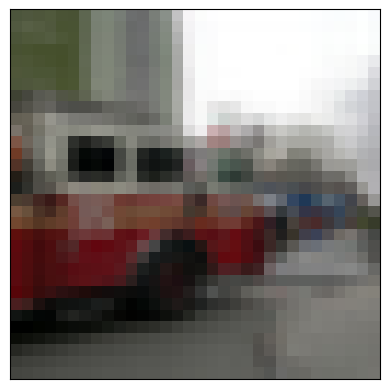

정답: truck 예측 결과: truck


In [11]:
cifar10_loader = DataLoader(cifar10_test, batch_size=1, shuffle=True)
dataiter = iter(cifar10_loader)
images, labels = next(dataiter)  # 샘플을 1개만 꺼낸다

plt.imshow(images[0].permute(1, 2, 0))  # 채널을 가장 뒤로
plt.tick_params(labelbottom=False, labelleft=False, bottom=False, left=False)  # 라벨과 메모리를 비표시로
plt.show()

net.eval()  # 평가 모드
x, t = images.cuda(), labels.cuda()  # GPU 대응
y = net(x)
print("정답:", cifar10_classes[labels[0]],
      "예측 결과:", cifar10_classes[y.argmax().item()])

In [13]:
from torchvision.datasets import CIFAR10
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer",
                   "dog", "frog", "horse", "ship", "truck"]

affine = transforms.RandomAffine((-30, 30), scale=(0.8, 1.2))  # 회전과 크기 조절
flip = transforms.RandomHorizontalFlip(p=0.5)  # 좌우 반전
normalize = transforms.Normalize((0.0, 0.0, 0.0), (1.0, 1.0, 1.0))  # 평균값을 0, 표준편차 1로
to_tensor = transforms.ToTensor()
erase =   transforms.RandomErasing(p=0.5)

transform_train = transforms.Compose([affine, flip, to_tensor, normalize, erase])  # ←여기에 코드를 추가 기입
transform_test = transforms.Compose([to_tensor, normalize])
cifar10_train = CIFAR10("./data", train=True, download=True, transform=transform_train)
cifar10_test = CIFAR10("./data", train=False, download=True, transform=transform_test)

# DataLoader의 설정
batch_size = 64
train_loader = DataLoader(cifar10_train, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(cifar10_test, batch_size=batch_size, shuffle=False)

In [14]:
import torch.nn as nn

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 8, 5)  # 합성곱층: (입력 채널 수, 필터 수, 필터 크기)
        self.relu = nn.ReLU()  # ReLU
        self.pool = nn.MaxPool2d(2, 2)  # 풀링층: (영역의 크기, 영역의 간격)
        self.conv2 = nn.Conv2d(8, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 256)  # 전결합층
        self.dropout = nn.Dropout(p=0.5)  # 드롭아웃:(p=드롭아웃률)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        # ------- 이하에 코드를 작성한다 -------
        x = self.relu(self.conv1(x))
        x = self.pool(x)
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(-1, 16*5*5)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        # ------- 여기까지 -------
        return x

net = Net()
net.cuda()  # GPU 대응
print(net)

Net(
  (conv1): Conv2d(3, 8, kernel_size=(5, 5), stride=(1, 1))
  (relu): ReLU()
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=256, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=256, out_features=10, bias=True)
)


In [15]:
from torch import optim

# 교차 엔트로피 오차 함수
loss_fnc = nn.CrossEntropyLoss()

# 최적화 알고리즘
optimizer = optim.Adam(net.parameters())

# 손실의 로그
record_loss_train = []
record_loss_test = []

# 학습
for i in range(20):  # 20 에포크 학습
    net.train()  # 훈련 모드
    loss_train = 0
    for j, (x, t) in enumerate(train_loader):  # 미니배치 (x, t)를 꺼낸다
        x, t = x.cuda(), t.cuda()  # GPU 대응
        y = net(x)
        loss = loss_fnc(y, t)
        loss_train += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    loss_train /= j+1
    record_loss_train.append(loss_train)

    net.eval()  # 평가 모드
    loss_test = 0
    for j, (x, t) in enumerate(test_loader):  # 미니배치 (x, t)를 꺼낸다
        x, t = x.cuda(), t.cuda()
        y = net(x)
        loss = loss_fnc(y, t)
        loss_test += loss.item()
    loss_test /= j+1
    record_loss_test.append(loss_test)

    if i%1 == 0:
        print("Epoch:", i, "Loss_Train:", loss_train, "Loss_Test:", loss_test)

Epoch: 0 Loss_Train: 1.917675635089045 Loss_Test: 1.6361840917805957
Epoch: 1 Loss_Train: 1.7252029005218954 Loss_Test: 1.5187175501683714
Epoch: 2 Loss_Train: 1.6509914027760402 Loss_Test: 1.443211794658831
Epoch: 3 Loss_Train: 1.6054015865411295 Loss_Test: 1.3949785467925344
Epoch: 4 Loss_Train: 1.5754673708125453 Loss_Test: 1.3650472794368769
Epoch: 5 Loss_Train: 1.5569854453396614 Loss_Test: 1.3673097916469452
Epoch: 6 Loss_Train: 1.5293178044621596 Loss_Test: 1.3007994389078419
Epoch: 7 Loss_Train: 1.5090048287225806 Loss_Test: 1.295126905486842
Epoch: 8 Loss_Train: 1.4985907452795513 Loss_Test: 1.278594949063222
Epoch: 9 Loss_Train: 1.4840169853871437 Loss_Test: 1.3021596005767773
Epoch: 10 Loss_Train: 1.4766185134268173 Loss_Test: 1.2715257102516806
Epoch: 11 Loss_Train: 1.4575360130013713 Loss_Test: 1.2459506783515784
Epoch: 12 Loss_Train: 1.4524285020425802 Loss_Test: 1.3278219403734632
Epoch: 13 Loss_Train: 1.444116815886534 Loss_Test: 1.2019243938907695
Epoch: 14 Loss_Train:

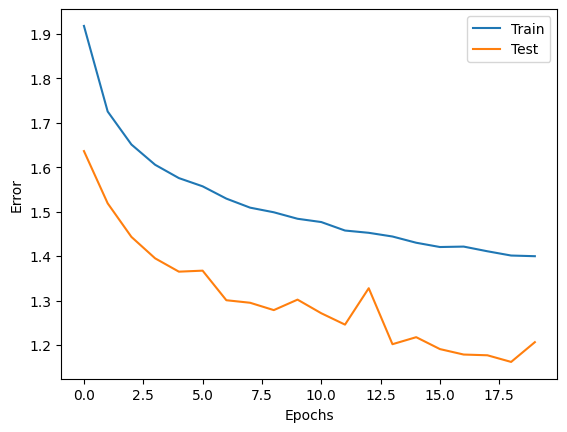

In [16]:
import matplotlib.pyplot as plt

plt.plot(range(len(record_loss_train)), record_loss_train, label="Train")
plt.plot(range(len(record_loss_test)), record_loss_test, label="Test")
plt.legend()

plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()

In [17]:
correct = 0
total = 0
net.eval()  # 평가 모드
for i, (x, t) in enumerate(test_loader):
    x, t = x.cuda(), t.cuda()  # GPU 대응
    y = net(x)
    correct += (y.argmax(1) == t).sum().item()
    total += len(x)
print("정답률:", str(correct/total*100) + "%")

정답률: 57.03%


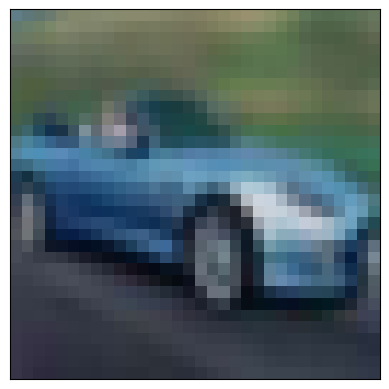

정답: automobile 예측 결과: automobile


In [18]:
cifar10_loader = DataLoader(cifar10_test, batch_size=1, shuffle=True)
dataiter = iter(cifar10_loader)
images, labels = next(dataiter)  # 샘플을 1개만 꺼낸다

plt.imshow(images[0].permute(1, 2, 0))  # 채널을 가장 뒤로
plt.tick_params(labelbottom=False, labelleft=False, bottom=False, left=False)  # 라벨과 메모리를 비표시로
plt.show()

net.eval()  # 평가 모드
x, t = images.cuda(), labels.cuda()  # GPU 대응
y = net(x)
print("정답:", cifar10_classes[labels[0]],
      "예측 결과:", cifar10_classes[y.argmax().item()])